In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt#for data visualization
import seaborn as sns # for data visualisation
import missingno as msno #for missing data in data visualization
from collections import Counter # for counting

In [2]:
df = pd.read_csv(r"C:\Users\welcome\Downloads\ds_salaries - ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
#to check for the statistics of non numerical columns
df.describe(include=['object','bool'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [8]:
#to check for missing data
null_vals = df.isnull().sum()
null_vals

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
#To remove the repeated index
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


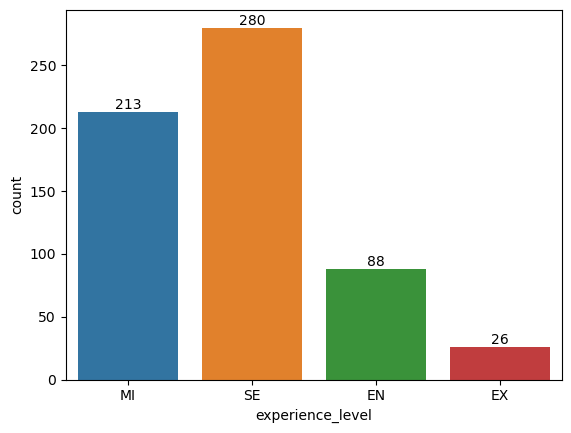

In [122]:
#count of experience level over 2020,2021 and 2022:
#MI:Medium level
#EN:entry level
#SE:senior level
#EX:expert level
epl=sns.countplot(x='experience_level',data = df);
for container in epl.containers:
    epl.bar_label(container)

Based on the output above,Senior level has the highest number of employment,followed by mid level,entry level and expert level taking the least number. 

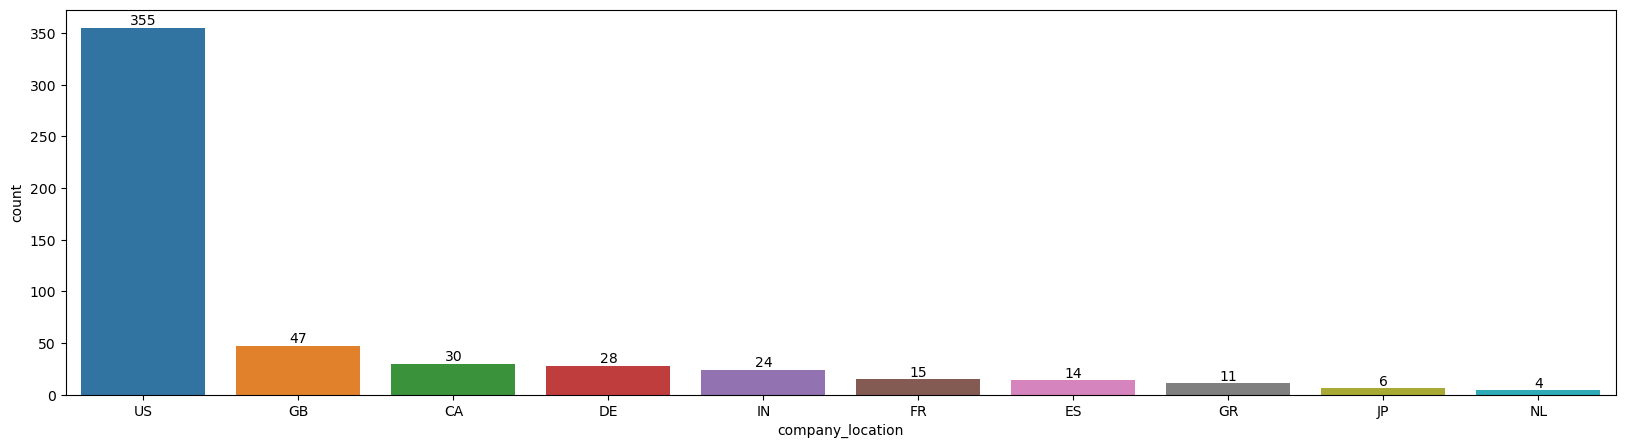

In [121]:
#There are over 50 company locations,so this chart showed the top twenty locations
plt.figure(figsize = (20,5))
toptwenty = df['company_location'].value_counts().head(10)
cl=sns.countplot(x='company_location' ,data = df, order =toptwenty.index);
for container in cl.containers:
    cl.bar_label(container)

it is obvious that US took the lead with huge margin .

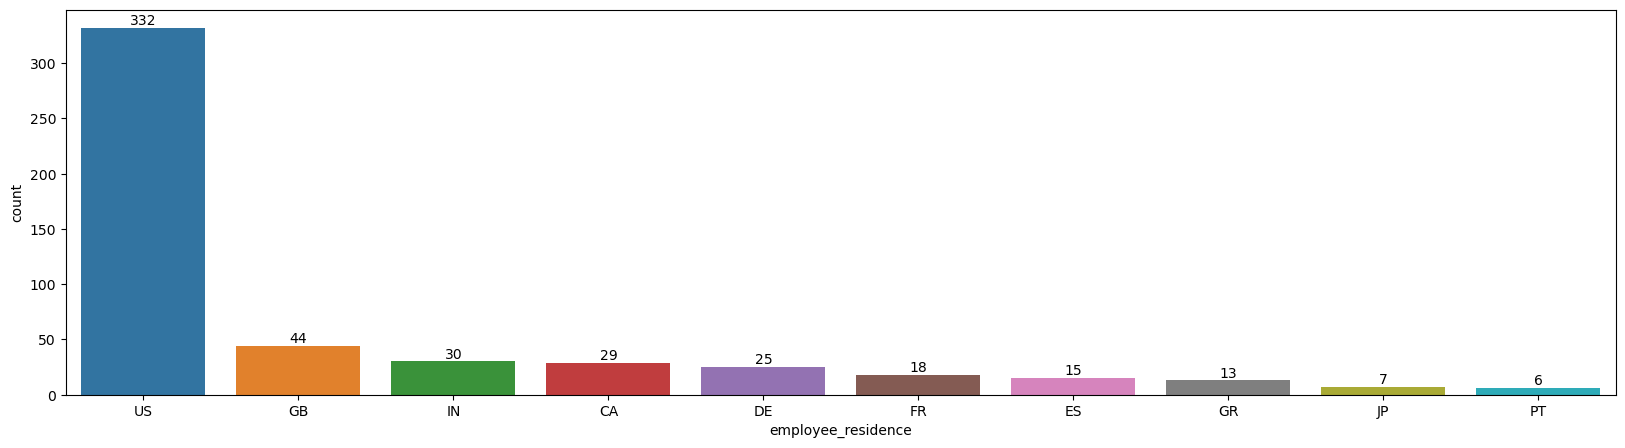

In [120]:
plt.figure(figsize = (20,5))
toptent = df['employee_residence'].value_counts().head(10)
ep=sns.countplot(x='employee_residence',data = df, order =toptent.index);
for container in ep.containers:
    ep.bar_label(container)

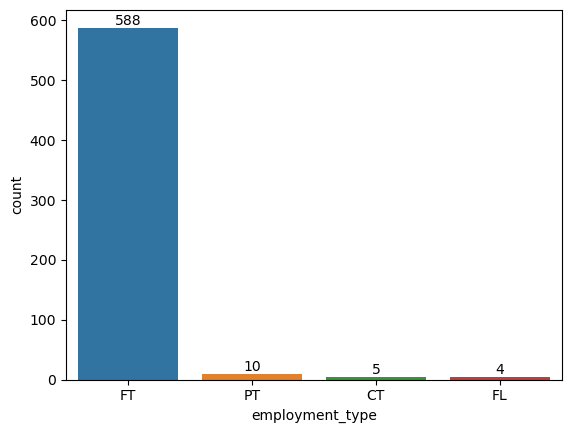

In [13]:
#count of employment types 
#ft:fulltime
#pt:parttime
#ct:contract
#fl:freelance
ax=sns.countplot(x = df['employment_type'],order = df['employment_type'].value_counts(ascending = False).index)
values = df['employment_type'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = values);

This shows that majority of the data personnels are full time.

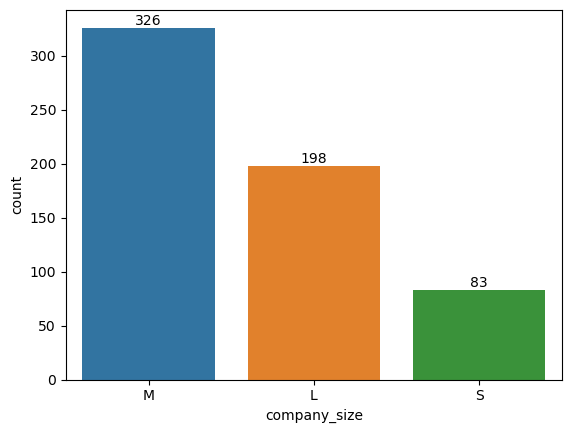

In [14]:
#count of company size
#l:large(more than 250 employees)
#m:medium(50 to 250 employees)
#s:small(less than 50)
ax=sns.countplot(x = df['company_size'],order = df['company_size'].value_counts(ascending = False).index)
values = df['company_size'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = values);

The highest recruiter seemed to be medium company(50-250 employers),followed by large companies and the small companies took the least. though,the data size is not blanced between the three company sizes

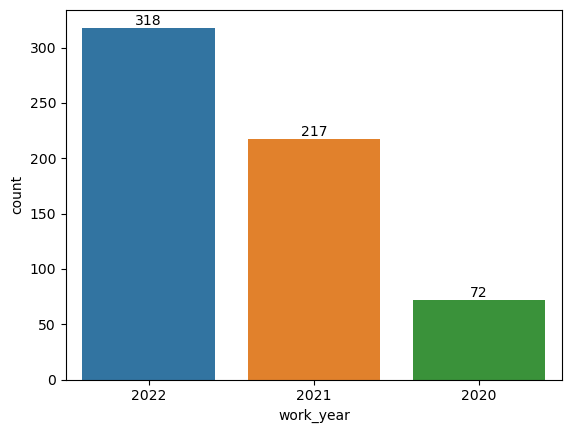

In [15]:
#count of work year
ax=sns.countplot(x = df['work_year'],order = df['work_year'].value_counts(ascending = False).index)
values = df['work_year'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = values);

#this showed that 2022 has the highest number of data job,followed by 2021 and 2020. This comfirmed  the fact that data job is increasing year by year.

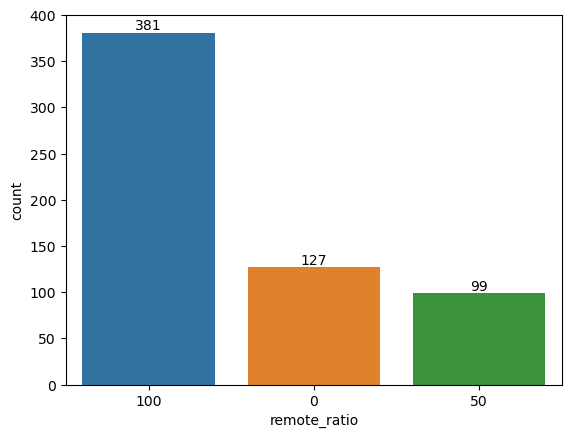

In [28]:
#count of remote_ration
#0:no remote work(less than 20%)
#50:partially remote()
#100:fully remote(more than 80%)
ax=sns.countplot(x = df['remote_ratio'],order = df['remote_ratio'].value_counts(ascending = False).index)
values = df['remote_ratio'].value_counts(ascending = False).values
ax.bar_label(container = ax.containers[0],labels = values);

This shows that more than 80% of the data jobs are fully remote jobs followed by partialy remote (between 20% and 80%)and no remote job took the least.

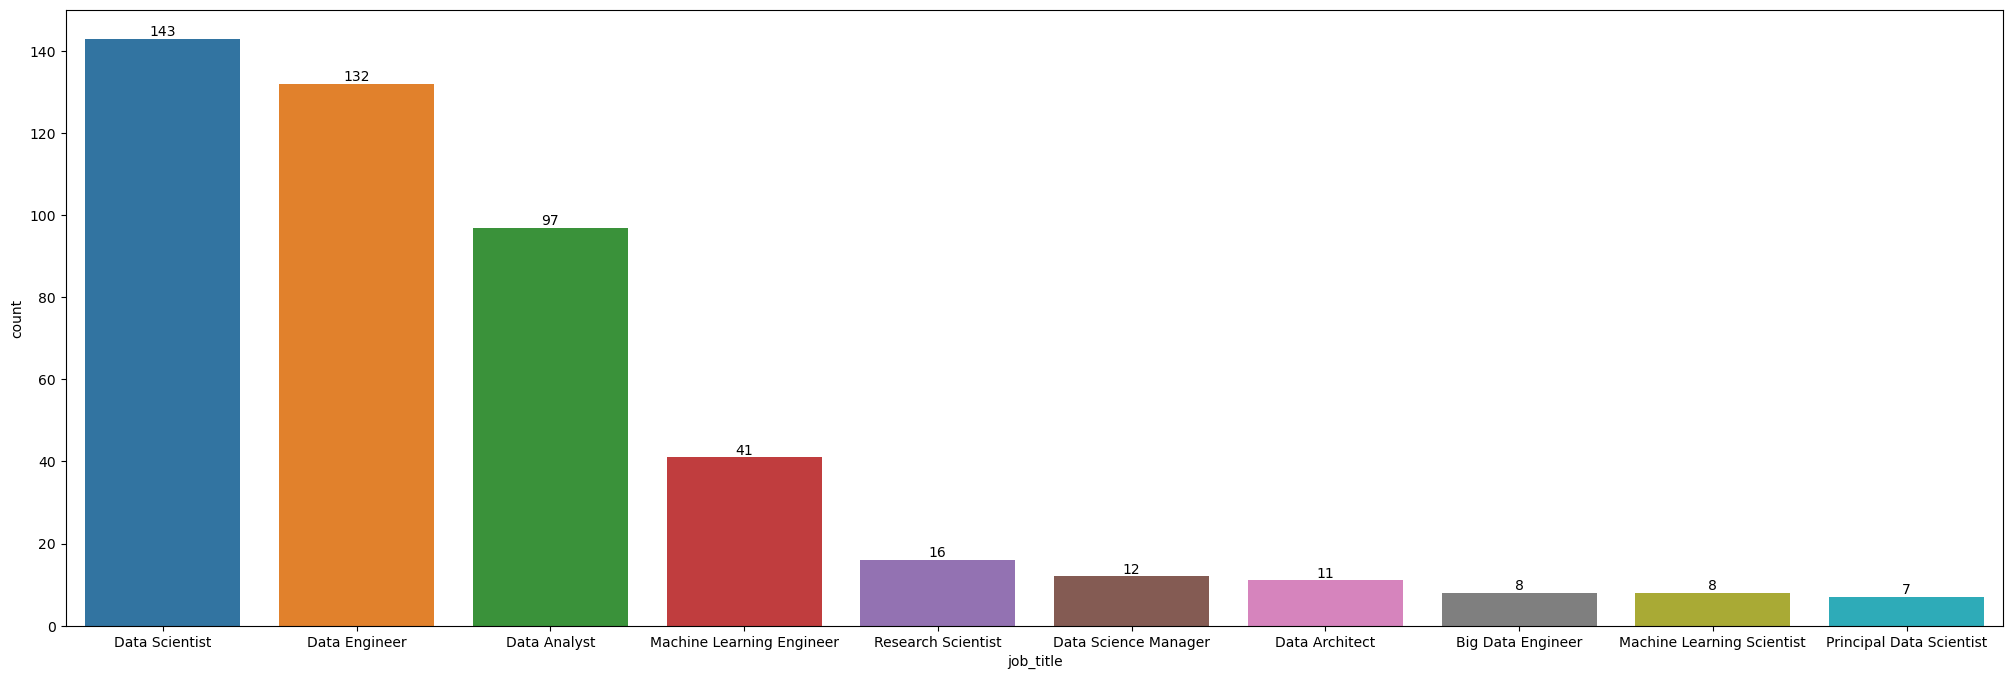

In [119]:
#count of job_title,top ten
plt.figure(figsize = (25,8))
toptenj = df['job_title'].value_counts().head(10)
jb=sns.countplot(x='job_title' ,data = df, order =toptenj.index);
for container in jb.containers:
    jb.bar_label(container)

Data scientist has the highest number of data job.

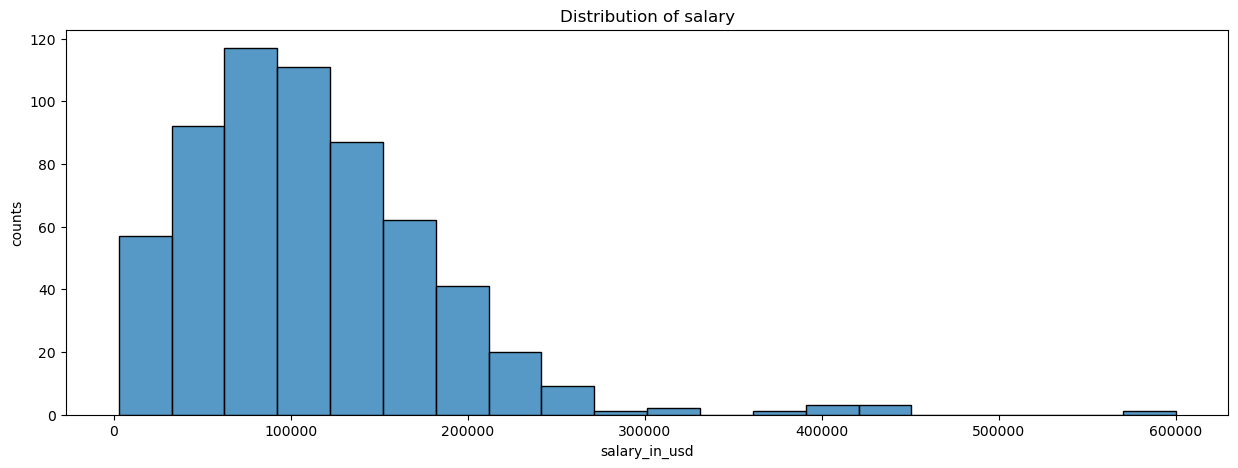

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(df['salary_in_usd'],bins=20)
plt.title('Distribution of salary')
plt.xlabel('salary_in_usd')
plt.ylabel('counts')
plt.show();

This shows that majority of the data jobs offers salaries around 100000 to 200000 usd.

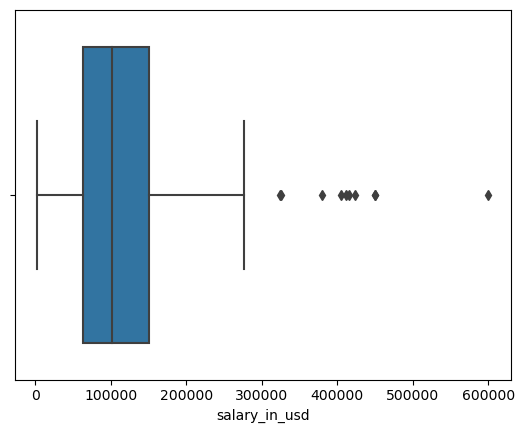

In [19]:
#to check for outliers in the salary column
sns.boxplot(x=df['salary_in_usd']);

This shows that the average salary paid over the years was around 100000 with some outliers up to 600000 which was only recorded in 2021

In [20]:
df[['job_title','work_year']].value_counts()

job_title                       work_year
Data Engineer                   2022         89
Data Scientist                  2022         77
Data Analyst                    2022         73
Data Scientist                  2021         45
Data Engineer                   2021         32
                                             ..
Lead Data Analyst               2020          1
Lead Data Engineer              2022          1
Lead Data Scientist             2021          1
Lead Machine Learning Engineer  2022          1
Staff Data Scientist            2021          1
Length: 98, dtype: int64

In [87]:
#jobtitle against salary and remote_ratio
job_tit = df.groupby('job_title')[['salary_in_usd','remote_ratio']].sum()
job_tit 

,salary_in_usd,remote_ratio
job_title,,
3D Computer Vision Researcher,5409,50
AI Scientist,462949,550
Analytics Engineer,700000,200
Applied Data Scientist,878275,350
Applied Machine Learning Scientist,568275,350
BI Data Analyst,448531,400
Big Data Architect,99703,50
Big Data Engineer,415792,400
Business Data Analyst,383456,450


## Data engineer recorded the highest number of remote ratio followed by data scientist and data analyst in contrary to the number of total jobs recorded for the iniviual jobs.

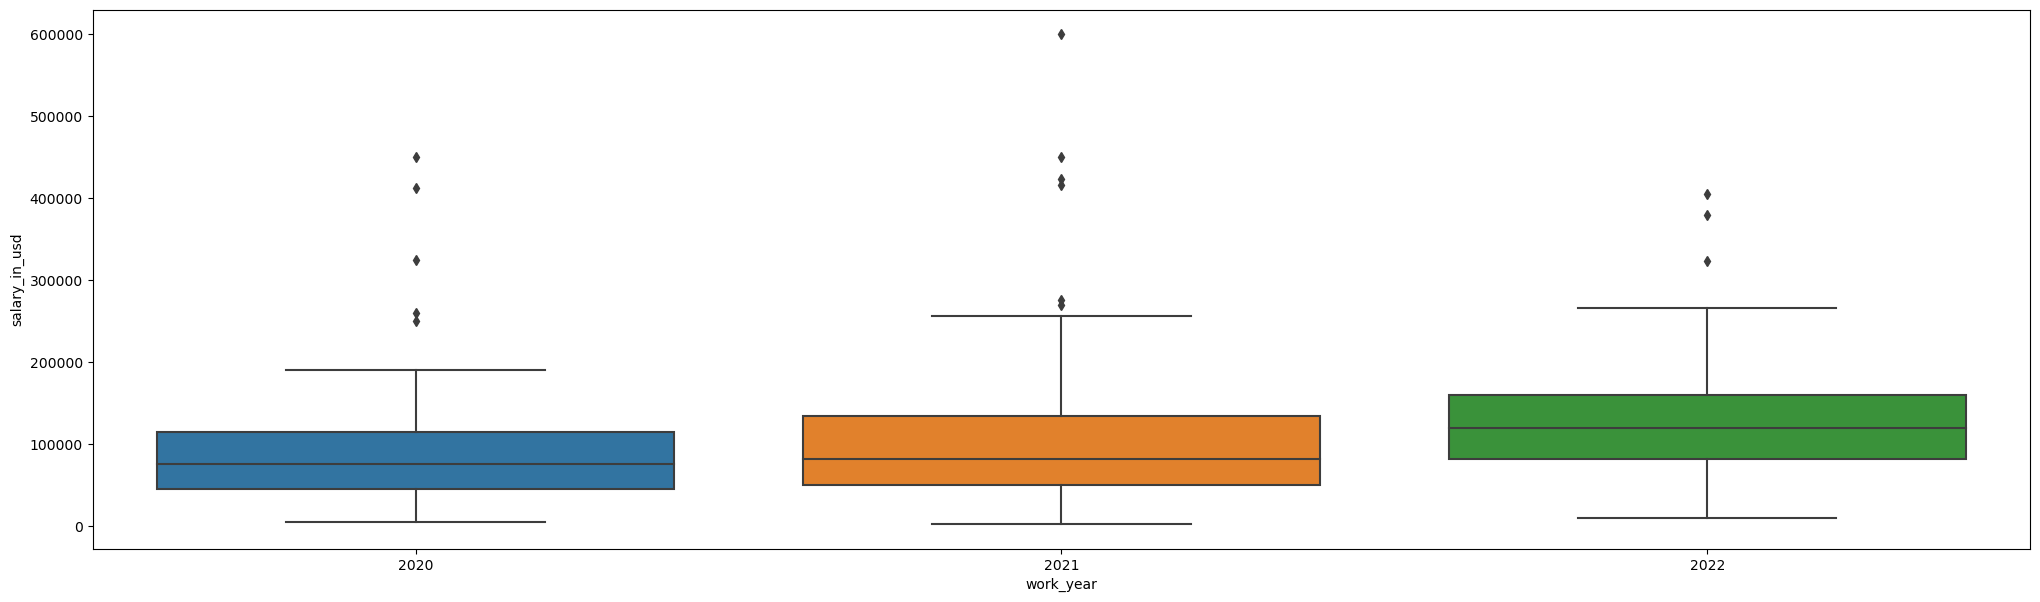

In [30]:
#to check relationship between salary and work_year
plt.subplots(figsize=(25,7))
sns.boxplot(x='work_year',y='salary_in_usd',data=df);

 Though,there were increments in salary of data jobs in 2022,it is surprising to see the highest figure of salary recorded so far to be in 2021.

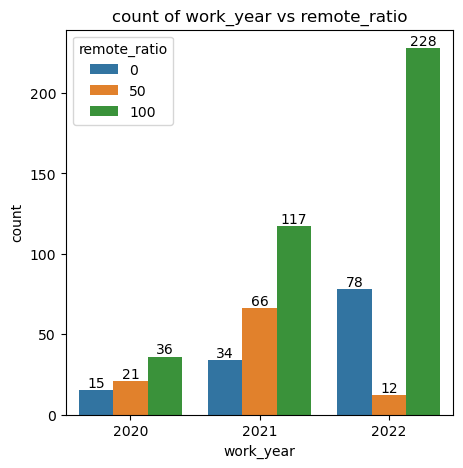

In [123]:
plt.figure(figsize =(5,5))
wy=sns.countplot(x ='work_year',data = df,hue = 'remote_ratio')
for container in wy.containers:
    wy.bar_label(container)
plt.xlabel('work_year')#to label
plt.ylabel('count')#for labelling
plt.title('count of work_year vs remote_ratio') ; 

This shows the count of remote ratio per year. we could see a very high significant increase in fully remote (amount of workdone remotely over 80%)works and  slight increase in no remote works (less than 20%)yearly,meanwhile, there was a decline in partially remote jobs in 2022.

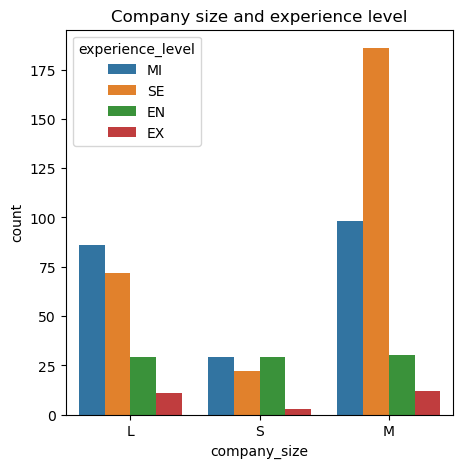

In [24]:
plt.figure(figsize =(5,5))
sns.countplot(x ='company_size',data = df,hue = 'experience_level')
plt.xlabel('company_size')#to label
plt.ylabel('count')#for labelling
plt.title('Company size and experience level') ; 

From the above,
large companies recruits more of mid level followed by senior level.
small companies recuits almost the same number of mid and entry levels but lower experts compared to others,
medium companies recruits mostly senior_level followed by mid level. 
However,we can see that medium companies employs more experts than large companies ,though,this may be due to the fact that medium companies are more in number in this data.They all have almost the same number of entry level data personnels.

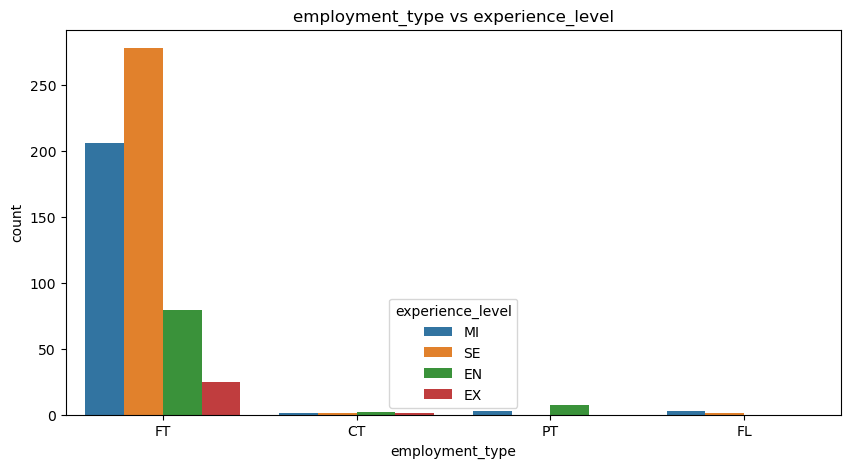

In [34]:
plt.figure(figsize =(10,5))
sns.countplot(x ='employment_type',data = df,hue = 'experience_level')
plt.xlabel('employment_type')#to label
plt.ylabel('count')#for labelling
plt.title('employment_type vs experience_level') ; 

This means most data personnels regardless of their experience worked as a full time compared to other mode of employment.

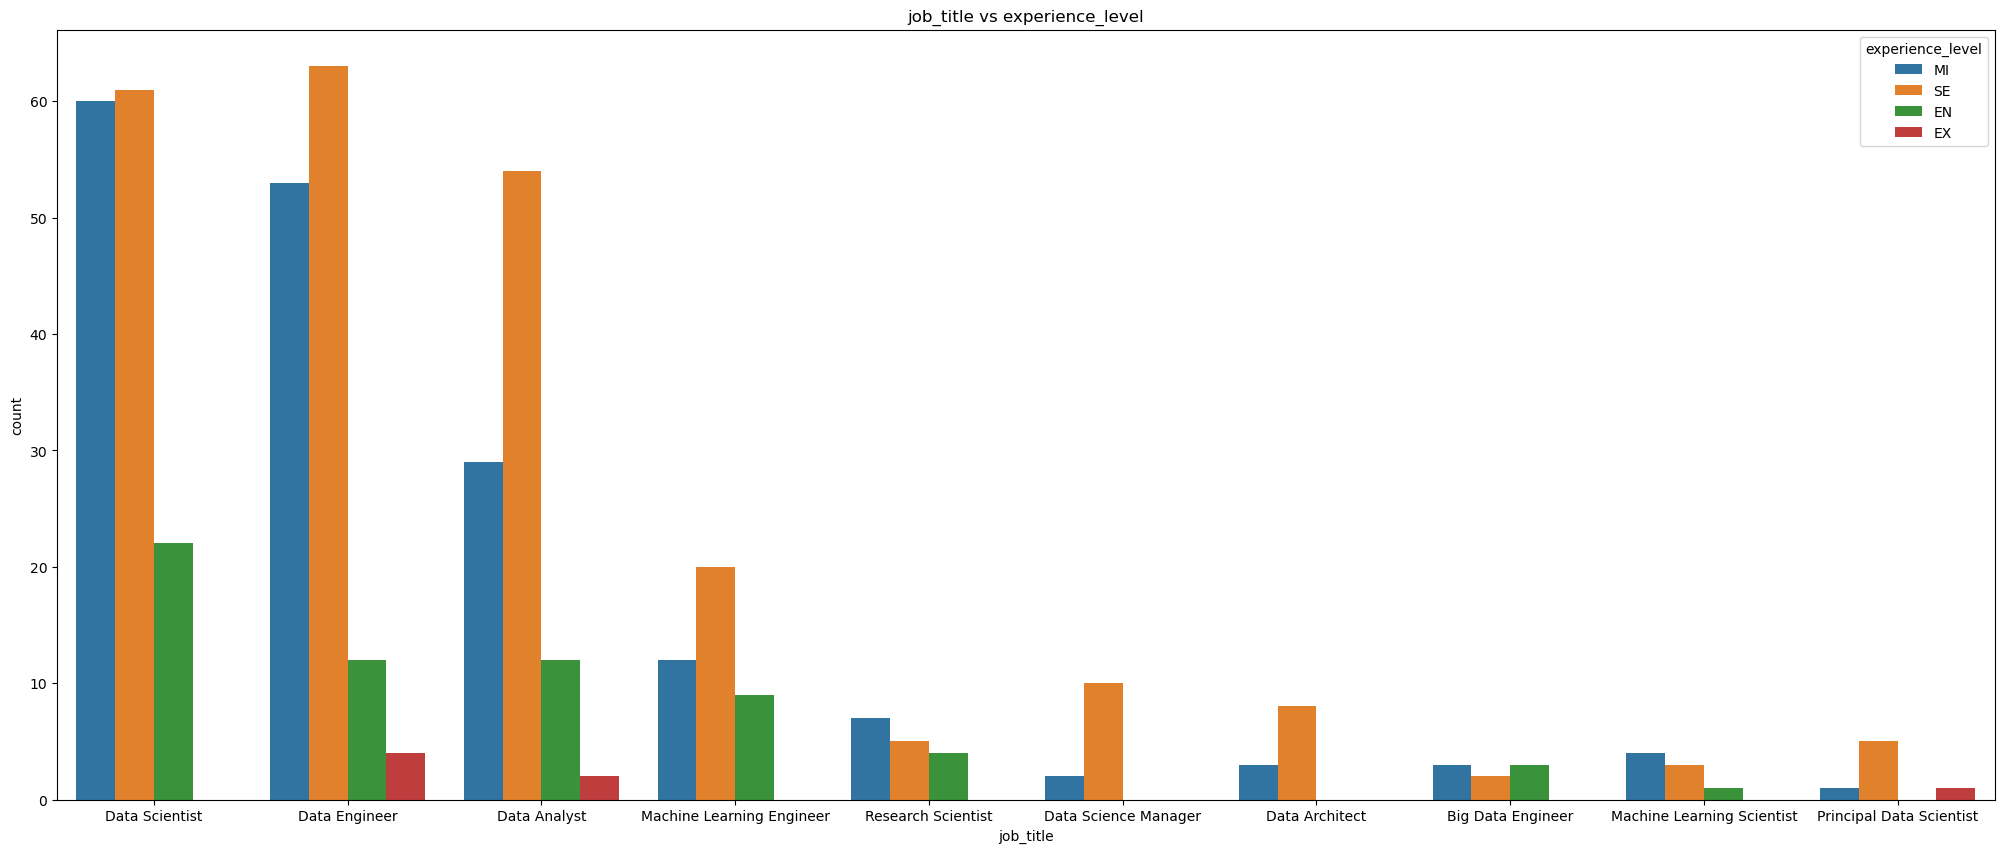

In [35]:
plt.figure(figsize =(25,10))
sns.countplot(x ='job_title',data = df,order = toptenj.index,hue = 'experience_level')
plt.xlabel('job_title')#to label
plt.ylabel('count')#for labelling
plt.title('job_title vs experience_level') ;  

oservations:
data scientist took the lead,followed by data engineer and data analyst.
experts are only available in data engineer,data analyst and principal data scientist based on the first 10 job_title.
data scientists had more entry level employment over these three years.


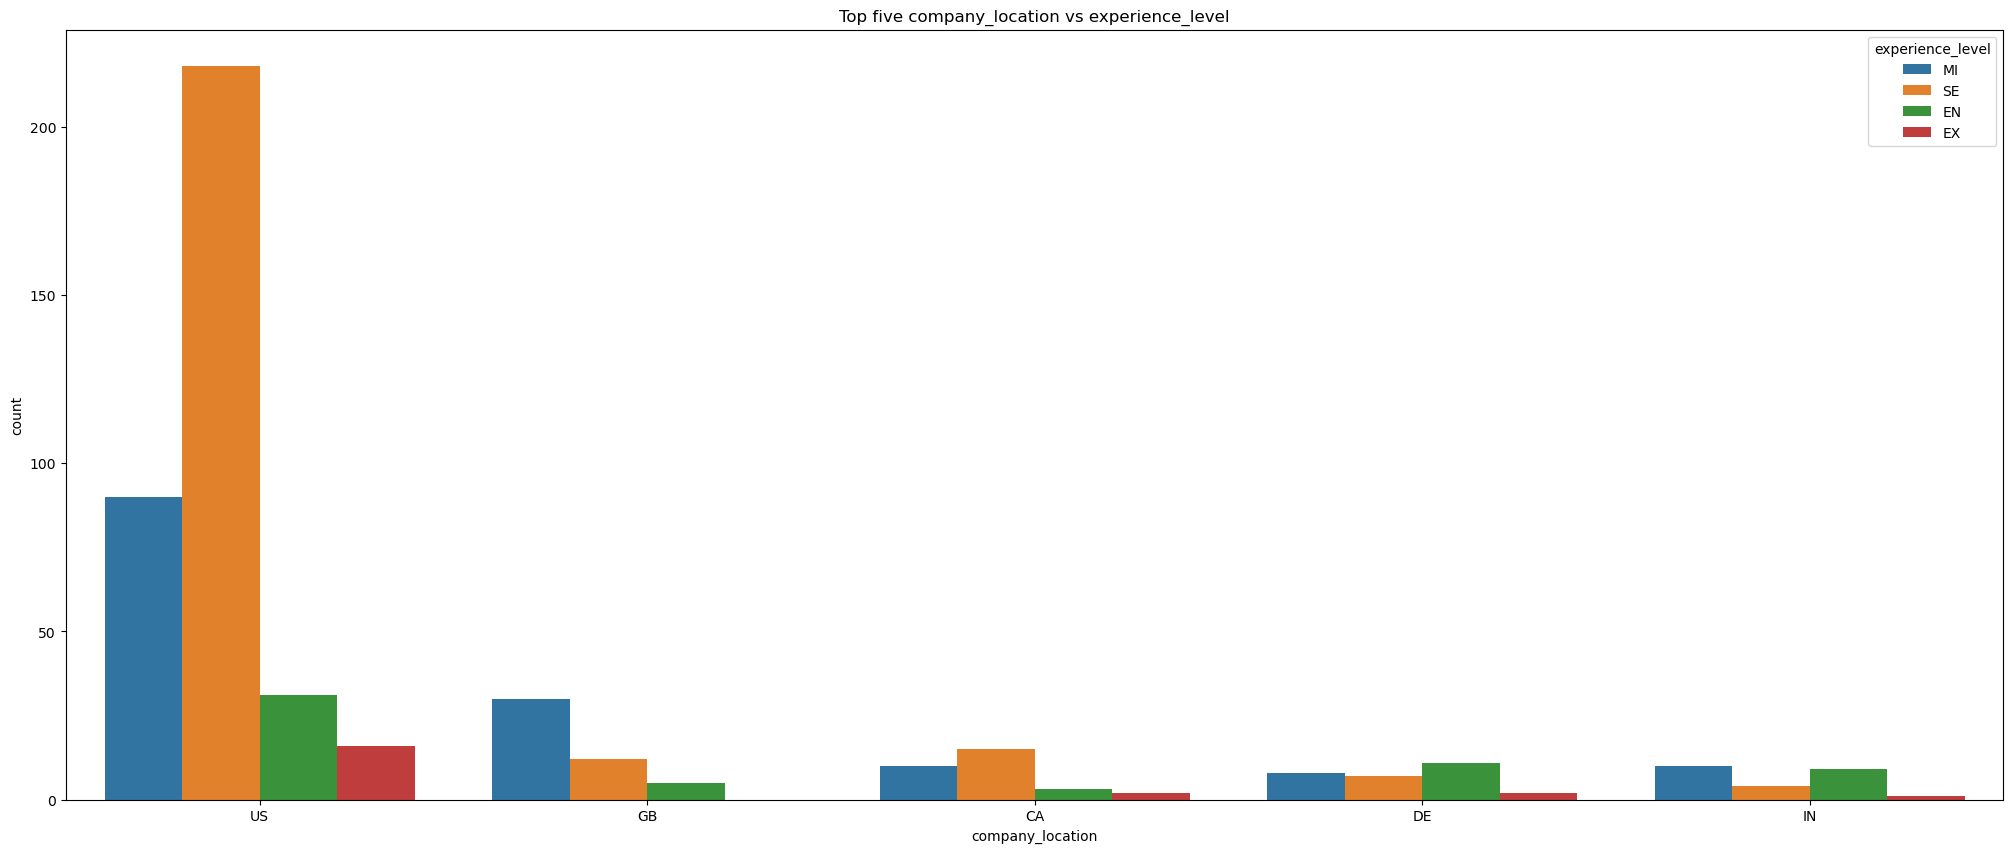

In [124]:
plt.figure(figsize =(25,10))
top5c = df['company_location'].value_counts().head(5)
sns.countplot(x ='company_location',data = df,order = top5c.index,hue = 'experience_level')
plt.xlabel('company_location')#to label
plt.ylabel('count')#for labelling
plt.title('Top five company_location vs experience_level');  

According to this,it means USA employs senior levels mostly and it's the top recruiter of data personnels

In [125]:
def salary_range (x):
    if x <= 50000:
        return "low_earner(<=50k)"
    elif x <=100000:
        return "average_earner(<=100000)"
    elif x <= 200000:
        return "high_earner(<=200000)"
    elif x <=400000:
        return "higher_earner(<=400000)"
    else:
        return "highest_earner(<=600000)"
#to create new column    
df["salary_label"] = df["salary_in_usd"].apply(salary_range)
    

In [126]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_label
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,average_earner(<=100000)
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,higher_earner(<=400000)
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,high_earner(<=200000)
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low_earner(<=50k)
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,high_earner(<=200000)


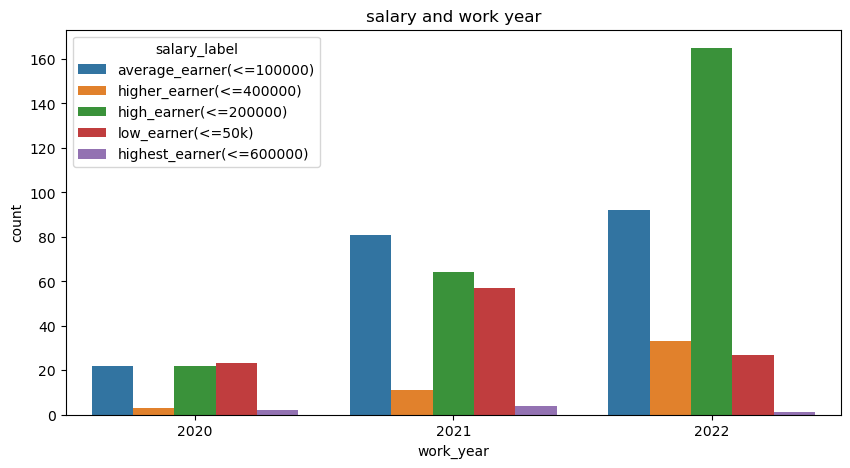

In [127]:
plt.figure(figsize =(10,5))
sns.countplot(x ='work_year',data = df,hue = 'salary_label')
plt.xlabel('work_year')#to label
plt.ylabel('count')#for labelling
plt.title('salary and work year') ; 

My observation is that the various categories of salaries increased year after year except for low earners,which is a good progress.

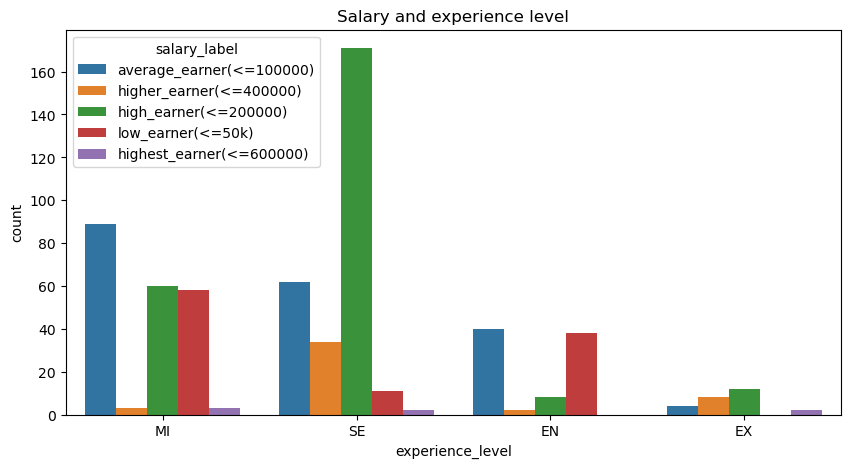

In [128]:
plt.figure(figsize =(10,5))
sns.countplot(x ='experience_level',data = df,hue = 'salary_label')
plt.xlabel('experience_level')#to label
plt.ylabel('count')#for labelling
plt.title('Salary and experience level') ; 

As observed here,the level of experience doesnt necessarily determine the salary of the data personnel,there are some low earners among senior levels though none among the experts. Also,it shows that some people at the entry level also earned as big as some in the upper level.

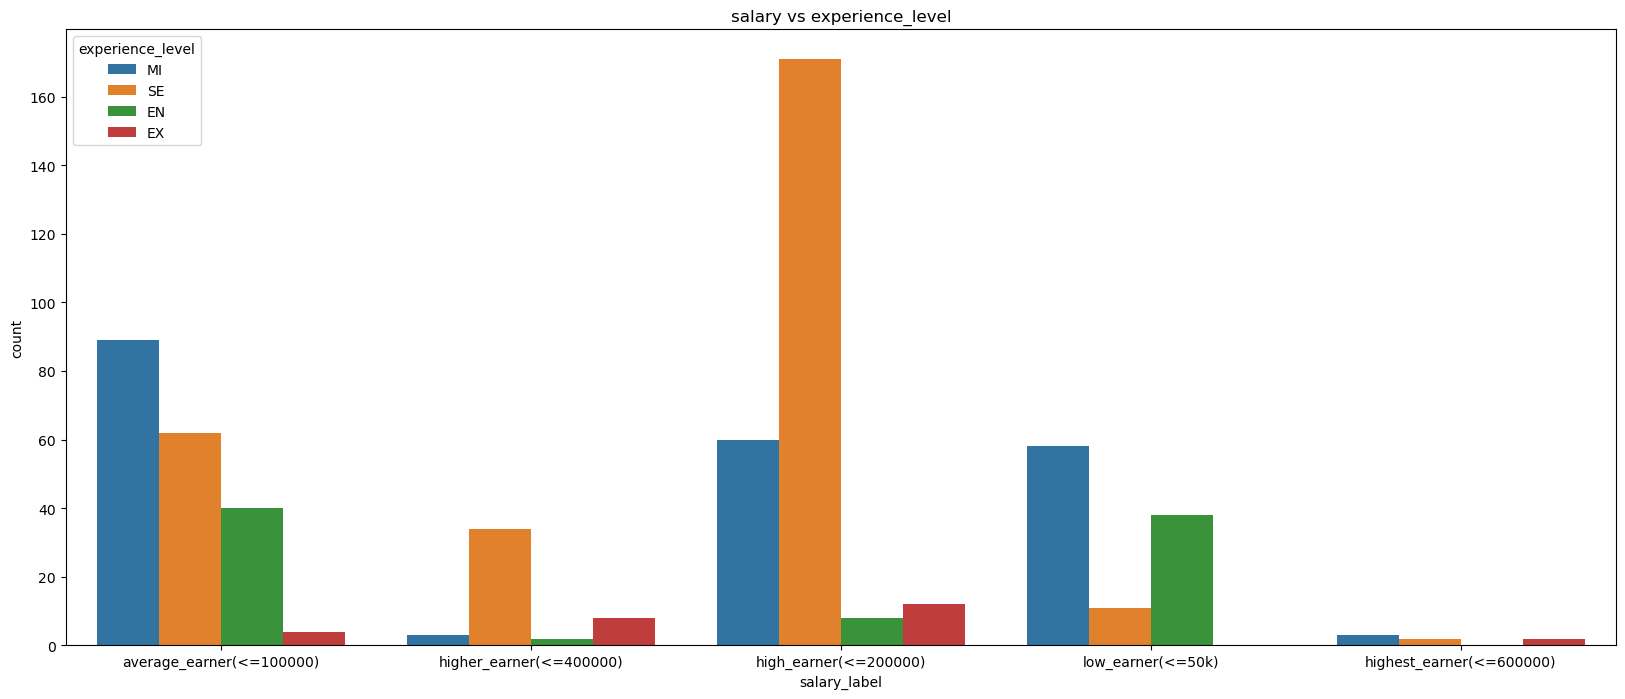

In [111]:
plt.figure(figsize =(20,8))
sns.countplot(x ='salary_label',data = df,hue = 'experience_level')
plt.xlabel('salary_label')#to label
plt.ylabel('count')#for labelling
plt.title('salary vs experience_level') ; 

This chart showed that there are some experienced data employeres that still earn lower than 50000.

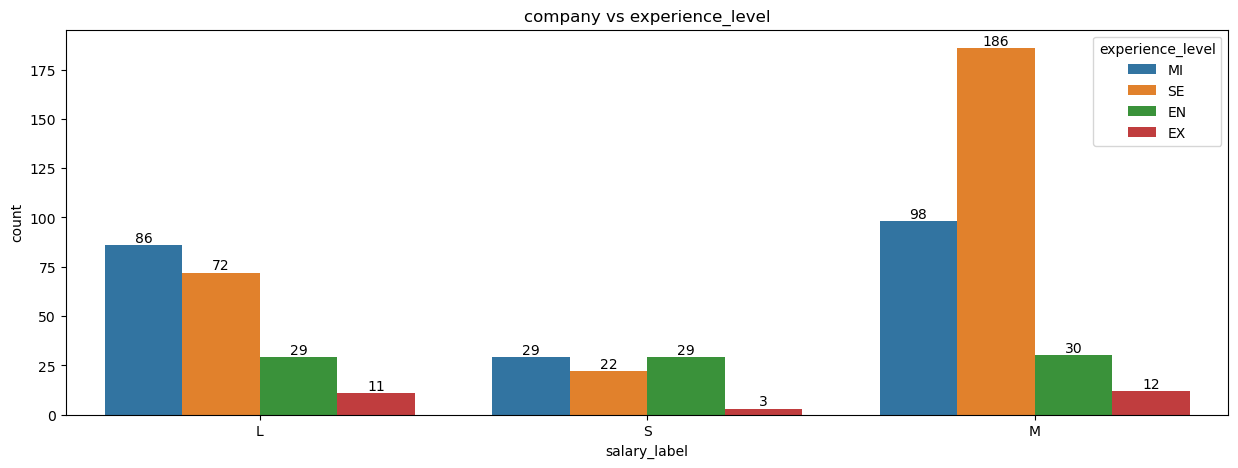

In [118]:
plt.figure(figsize =(15,5))
cs=sns.countplot(x ='company_size',data = df,hue = 'experience_level')
for container in cs.containers:
    cs.bar_label(container)
plt.xlabel('salary_label')#to label
plt.ylabel('count')#for labelling
plt.title('company vs experience_level') ; 

As seen here,all the companies employed experts but not as much as other experiences and almost the same rate of employing entry level.

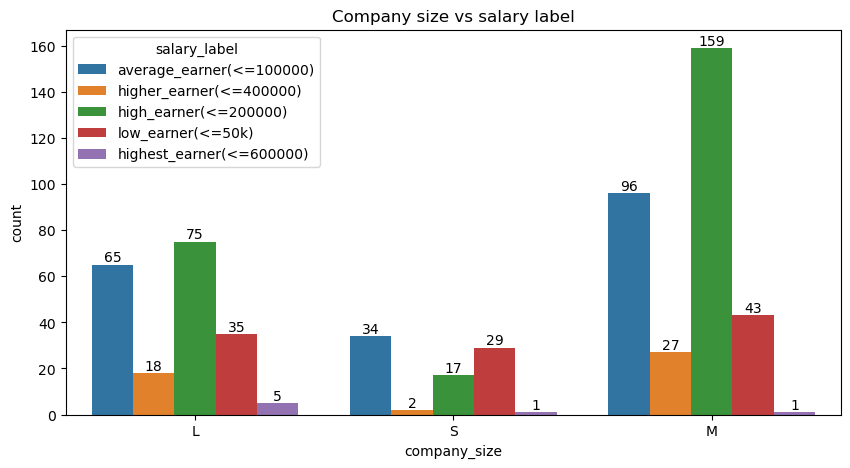

In [129]:
plt.figure(figsize =(10,5))
cs=sns.countplot(x ='company_size',data = df,hue = 'salary_label')
for container in cs.containers:
    cs.bar_label(container)
plt.xlabel('company_size')#to label
plt.ylabel('count')#for labelling
plt.title('Company size vs salary label') ; 

#We can see diversity of salary earners across the different company sizes

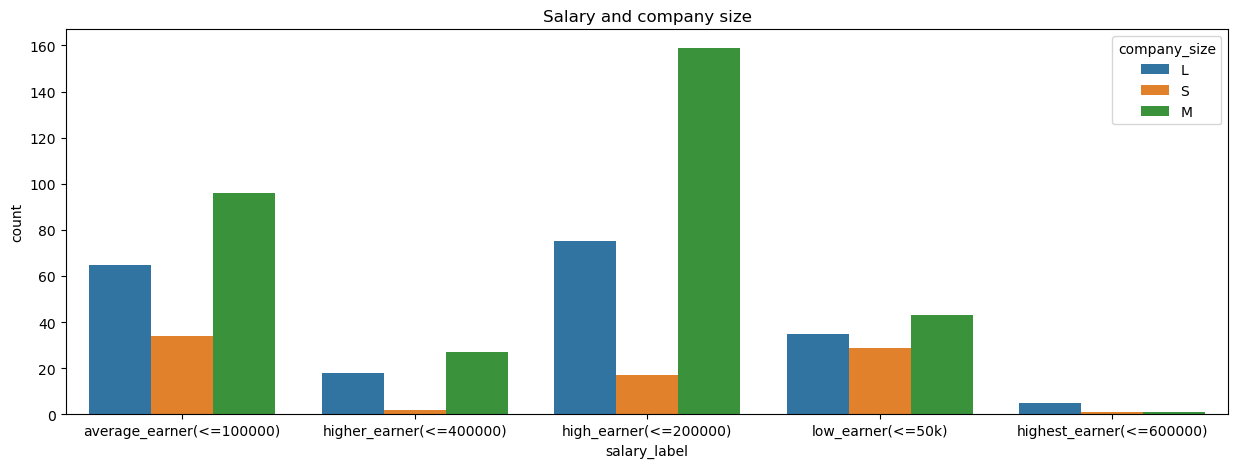

In [114]:
plt.figure(figsize =(15,5))
sns.countplot(x ='salary_label',data = df,hue = 'company_size')
plt.xlabel('salary_label')#to label
plt.ylabel('count')#for labelling
plt.title('Salary and company size') ; 

 This is a chart of different salary labels in relation to company sizes, thereare few people collecting more than 400000 and they dominated the large companies though some are in the small and medium companies

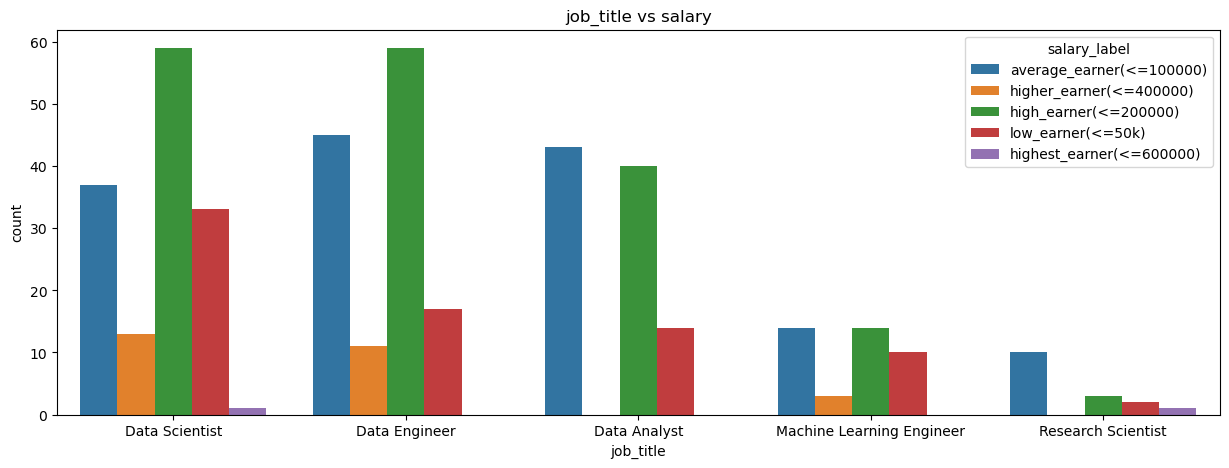

In [115]:
plt.figure(figsize =(15,5))
top5j = df['job_title'].value_counts().head(5)
sns.countplot(x ='job_title',data = df,order = top5j.index,hue = 'salary_label')
plt.xlabel('job_title')#to label
plt.ylabel('count')#for labelling
plt.title('job_title vs salary');  

This shows that data scientist and research scientist are jobs with the highest earners while data analysts are low to average earners.

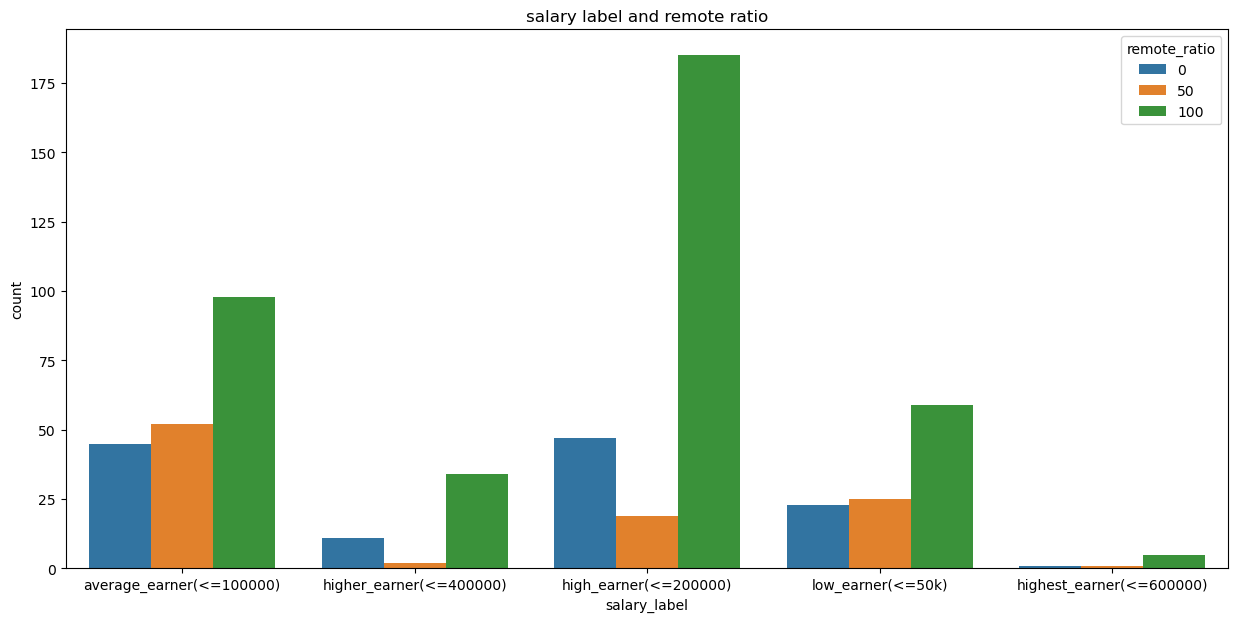

In [116]:
plt.figure(figsize =(15,7))
sns.countplot(x ='salary_label',data = df,hue = 'remote_ratio')
plt.xlabel('salary_label')#to label
plt.ylabel('count')#for labelling
plt.title('salary label and remote ratio') ; 

This shows that fully remote jobs are more prominent across all salaries,this means that that type of job doesnt determine the weight of the salary to be earned.

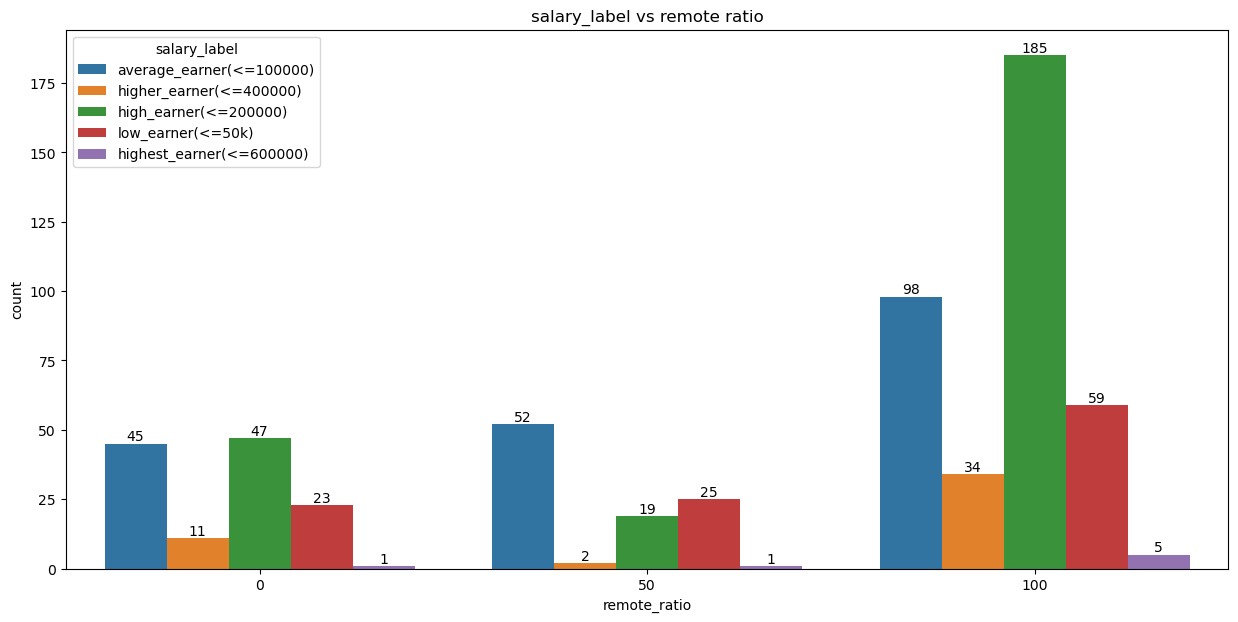

In [117]:
plt.figure(figsize =(15,7))
fd=sns.countplot(x ='remote_ratio',data = df,hue = 'salary_label')
for container in fd.containers:
    fd.bar_label(container)
plt.xlabel('remote_ratio')#to label
plt.ylabel('count')#for labelling
plt.title('salary_label vs remote ratio') ; 

 As said earlier,fully remote jobs took the lead in terms of salary range and we can see that greatest earners are more in this category.

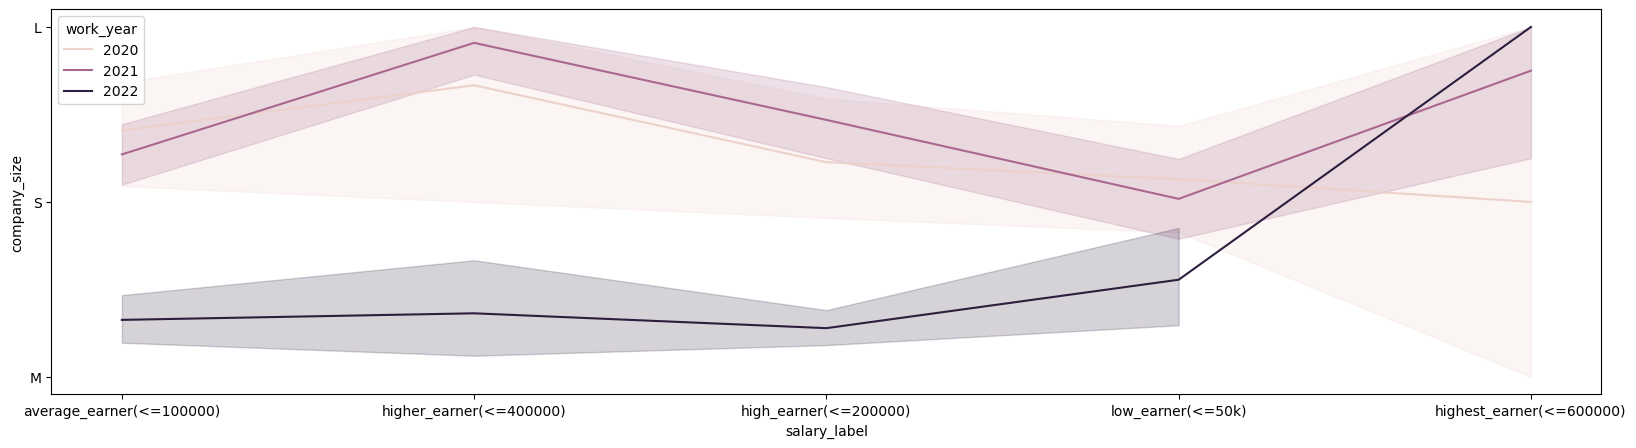

In [131]:
plt.figure(figsize = (20,5))
sns.lineplot(x ="salary_label",y = 'company_size',data = df,hue = 'work_year');

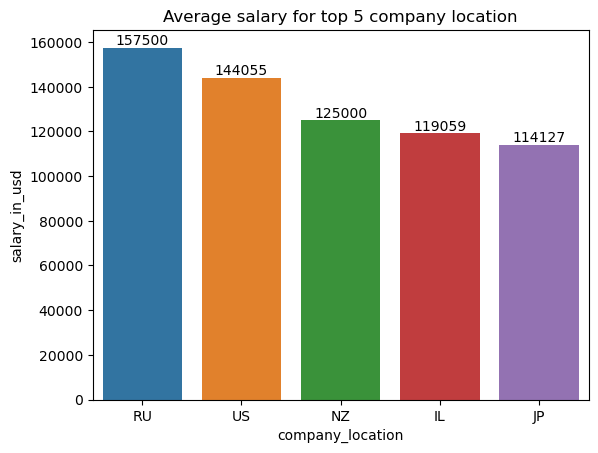

In [105]:
#To plot the locations with the top 5 average salary
procat = df.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending = False)
top5p= procat [:5]
dp=sns.barplot(x=procat.index,y= procat,order =top5p.index)
for container in dp.containers:
    dp.bar_label(container)
plt.title('Average salary for top 5 company location');


interestingly,despite USA being the top employer of data personnels,Russia surpases it in terms of salaries,which means Russia pays more.

In [68]:
procat = df.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending = False)
procat

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
SG     89294.000000
BE     85699.000000
DE     81887.214286
GB     81583.042553
AT     72920.750000
CN     71665.500000
IE     71444.000000
PL     66082.500000
CH     64114.000000
FR     63970.666667
SI     63831.000000
RO     60000.000000
NL     54945.750000
DK     54386.333333
ES     53060.142857
GR     52293.090909
CZ     50937.000000
PT     47793.750000
HR     45618.000000
LU     43942.666667
CL     40038.000000
MY     40000.000000
IT     36366.500000
HU     35735.000000
EE     32974.000000
MX     32123.333333
NG     30000.000000
IN     28581.750000
MT     28369.000000
CO     21844.000000
TR     20096.666667
HN     20000.000000
BR     18602.666667
AS     18053.000000
MD     18000.000000
UA     13400.000000
PK     13333.333333
KE      9272.000000
IR      4000.000000
VN 

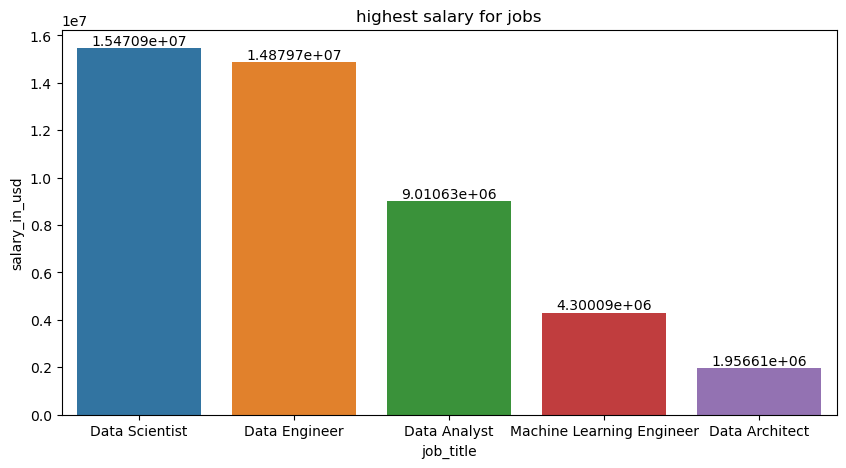

In [104]:
plt.figure(figsize=(10,5))
salh = df.groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending = False)
top5s= salh [:5]
salv=sns.barplot(x=salh.index,y=salh,order =top5s.index)
for container in salv.containers:
    salv.bar_label(container)
plt.title('highest salary for jobs');
plt.show;

Cummulatively.data science is the highest paid job while data architect took the fifth place in replace of research scientist on the highest job number

In [100]:
salh = df.groupby(['job_title'])['salary_in_usd'].sum().sort_values(ascending = False)
salh

job_title
Data Scientist                              15470860
Data Engineer                               14879700
Data Analyst                                 9010627
Machine Learning Engineer                    4300086
Data Architect                               1956613
Data Science Manager                         1899942
Research Scientist                           1744312
Principal Data Scientist                     1506697
Director of Data Science                     1365518
Machine Learning Scientist                   1267300
Principal Data Engineer                       985000
Data Analytics Manager                        889940
Applied Data Scientist                        878275
Lead Data Engineer                            838347
Head of Data                                  800813
ML Engineer                                   705024
Analytics Engineer                            700000
Data Engineering Manager                      616136
Head of Data Science                